In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [2]:
data_path = '../data/'
lines = open(data_path+'강수일수.csv', 'r').readlines()[46:-1]
print(lines[0])
print(lines[-1])

1990,26.6,29.9,20.9,17.4

2019,23.9,33.4,26.6,4.9



In [3]:
data = []
years = []
for line in lines:
    year, Spr, Sum, Fal, Win = line.strip().split(',')
    data.append([np.float(Spr), np.float(Sum), np.float(Fal), np.float(Win)])
    years.append(np.int(year))

In [4]:
df = pd.DataFrame(data)
df.columns = ['Spr', 'Sum', 'Fal', 'Win']
df.index = years
print(df)

       Spr   Sum   Fal   Win
1990  26.6  29.9  20.9  17.4
1991  25.1  40.3  14.4  18.1
1992  31.6  25.6  19.6  16.7
1993  20.0  46.1  18.1  12.0
1994  22.9  18.3  12.7  10.0
1995  24.1  32.1  13.7   6.1
1996  21.3  32.3  18.0   8.6
1997  27.9  35.7  14.7  20.1
1998  25.6  48.0  17.4   8.1
1999  25.3  44.4  23.6   8.9
2000  20.7  33.1  23.0  15.9
2001  16.9  31.9  17.1  14.6
2002  24.3  36.4  15.7  19.9
2003  30.6  43.9  23.1   9.6
2004  28.4  34.3  23.3  13.9
2005  22.3  38.1  18.6  14.4
2006  25.7  39.7  17.3  11.4
2007  21.3  37.6  21.9  16.0
2008  23.9  36.3  16.1  14.1
2009  22.1  41.9  19.9  17.9
2010  34.9  40.6  18.6  12.1
2011  24.1  48.1  24.3  15.0
2012  29.6  39.0  21.4  21.3
2013  21.0  31.3  24.3  16.9
2014  27.6  46.9  21.1  21.0
2015  28.6  34.3  28.0  18.6
2016  27.9  32.6  34.1  16.9
2017  24.1  36.1  14.1  10.1
2018  29.4  30.4  23.9  13.6
2019  23.9  33.4  26.6   4.9


In [5]:
def div_xy(data, seek_step, features):
    x, y = [], []
    for i in range(len(data)-seek_step-1):
        x.append(data[i:i+seek_step])
        y.append(data[i+seek_step])
    return np.array(x, dtype=np.float).reshape(-1, seek_step, features), np.array(y, dtype=np.float).reshape(-1, features)

In [6]:
train_dataset = df[df.index < 2019].dropna().values
test_dataset = df[df.index == 2019].dropna().values
print(train_dataset[:5])
print(test_dataset)

[[26.6 29.9 20.9 17.4]
 [25.1 40.3 14.4 18.1]
 [31.6 25.6 19.6 16.7]
 [20.  46.1 18.1 12. ]
 [22.9 18.3 12.7 10. ]]
[[23.9 33.4 26.6  4.9]]


In [7]:
seek_step = 5
features = 4

x_train, y_train = div_xy(train_dataset, seek_step, features)
for i in range(5):
    print(x_train[i], end=' : ')
    print(y_train[i])

[[26.6 29.9 20.9 17.4]
 [25.1 40.3 14.4 18.1]
 [31.6 25.6 19.6 16.7]
 [20.  46.1 18.1 12. ]
 [22.9 18.3 12.7 10. ]] : [24.1 32.1 13.7  6.1]
[[25.1 40.3 14.4 18.1]
 [31.6 25.6 19.6 16.7]
 [20.  46.1 18.1 12. ]
 [22.9 18.3 12.7 10. ]
 [24.1 32.1 13.7  6.1]] : [21.3 32.3 18.   8.6]
[[31.6 25.6 19.6 16.7]
 [20.  46.1 18.1 12. ]
 [22.9 18.3 12.7 10. ]
 [24.1 32.1 13.7  6.1]
 [21.3 32.3 18.   8.6]] : [27.9 35.7 14.7 20.1]
[[20.  46.1 18.1 12. ]
 [22.9 18.3 12.7 10. ]
 [24.1 32.1 13.7  6.1]
 [21.3 32.3 18.   8.6]
 [27.9 35.7 14.7 20.1]] : [25.6 48.  17.4  8.1]
[[22.9 18.3 12.7 10. ]
 [24.1 32.1 13.7  6.1]
 [21.3 32.3 18.   8.6]
 [27.9 35.7 14.7 20.1]
 [25.6 48.  17.4  8.1]] : [25.3 44.4 23.6  8.9]


In [8]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [9]:
history = LossHistory()
history.init()

model = Sequential()
model.add(SimpleRNN(units=256, batch_input_shape=(1,seek_step,features), stateful=True))
model.add(Dense(features))
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=100, batch_size=1, callbacks=[history])

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 375.8290 - accuracy: 0.9130
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 163.1270 - accuracy: 0.9565
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 84.2037 - accuracy: 0.9565
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 45.8879 - accuracy: 0.9565
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 28.6032 - accuracy: 0.9565
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 22.9017 - accuracy: 0.9565
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 21.0141 - accuracy: 0.9565
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 20.4989 - accuracy: 0.9565
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 20.4388 - accuracy: 0.9565
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 19.5865 - accuracy: 0.95

23/23 [==============================] - 0s 1ms/step - loss: 1.7514 - accuracy: 0.9565
Epoch 83/100
23/23 [==============================] - 0s 1ms/step - loss: 1.9479 - accuracy: 0.9565
Epoch 84/100
23/23 [==============================] - 0s 1ms/step - loss: 2.5527 - accuracy: 0.9565
Epoch 85/100
23/23 [==============================] - 0s 1ms/step - loss: 1.5604 - accuracy: 0.9565
Epoch 86/100
23/23 [==============================] - 0s 1ms/step - loss: 1.8510 - accuracy: 0.9565
Epoch 87/100
23/23 [==============================] - 0s 1ms/step - loss: 1.8144 - accuracy: 0.9565
Epoch 88/100
23/23 [==============================] - 0s 1ms/step - loss: 1.5171 - accuracy: 0.9565
Epoch 89/100
23/23 [==============================] - 0s 1ms/step - loss: 1.9139 - accuracy: 0.9565
Epoch 90/100
23/23 [==============================] - 0s 1ms/step - loss: 1.0255 - accuracy: 0.9565
Epoch 91/100
23/23 [==============================] - 0s 1ms/step - loss: 1.1774 - accuracy: 0.9565
Epoch 92/100


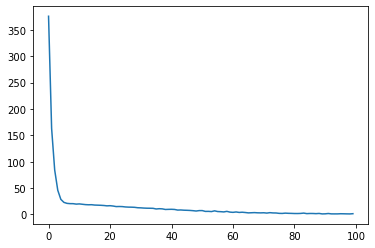

In [11]:
loss = history.losses
epochs = range(len(loss))
plt.plot(epochs, loss)
plt.show()

In [12]:
y_hat = []
for trained_x in x_train:
    trained_x = trained_x.reshape(1, seek_step, features)
    y_hat.append(model.predict(trained_x))
length = range(len(y_hat))
y_hat = np.squeeze(y_hat)

In [13]:
width = 0.35
x = np.arange(len(y_train[:, 0]))

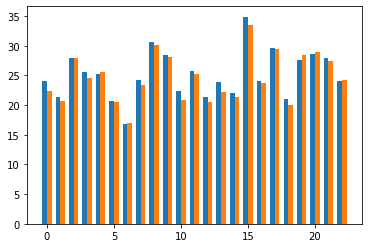

In [14]:
fig, ax = plt.subplots()
real = ax.bar(x=x-width/2, height=y_train[:, 0], width=width)
pred = ax.bar(x=x+width/2, height=y_hat[:, 0], width=width)
plt.show()

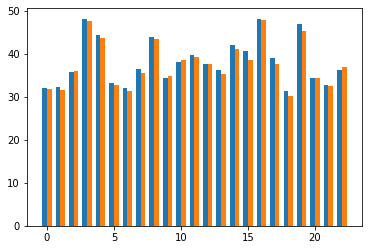

In [15]:
fig, ax = plt.subplots()
real = ax.bar(x=x-width/2, height=y_train[:, 1], width=width)
pred = ax.bar(x=x+width/2, height=y_hat[:, 1], width=width)
plt.show()

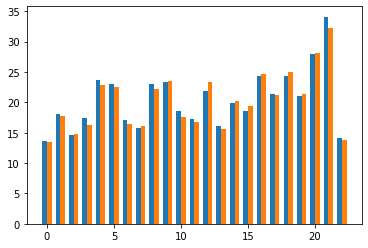

In [16]:
fig, ax = plt.subplots()
real = ax.bar(x=x-width/2, height=y_train[:, 2], width=width)
pred = ax.bar(x=x+width/2, height=y_hat[:, 2], width=width)
plt.show()

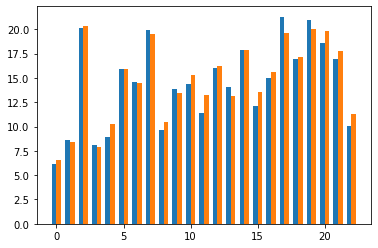

In [17]:
fig, ax = plt.subplots()
real = ax.bar(x=x-width/2, height=y_train[:, 3], width=width)
pred = ax.bar(x=x+width/2, height=y_hat[:, 3], width=width)
plt.show()

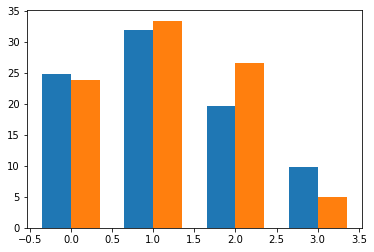

In [18]:
y_pred = model.predict(train_dataset[-5:].reshape(1, seek_step, features))
y_pred = np.squeeze(y_pred)
y_test = np.squeeze(test_dataset)

x = np.arange(len(y_pred))

fig, ax = plt.subplots()
real = ax.bar(x=x-width/2, height=y_pred, width=width)
pred = ax.bar(x=x+width/2, height=y_test, width=width)
plt.show()